In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from os import listdir
from sklearn.preprocessing import StandardScaler
import umap
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from matplotlib_venn import venn2, venn3

In [2]:
# taxfiles = listdir('../../MOTUS_TAX/')
# tax_values = []; samples = [];
# for f in taxfiles:
#     temp = pd.read_csv('../../MOTUS_TAX/'+f,skiprows=2,sep='\t')
#     tax_values.append(list(temp['unnamed sample']))
#     samples.append(f.split('_')[0])
# temp = pd.read_csv('../../MOTUS_TAX/A10_tax.txt',skiprows=2,sep='\t')
# taxnames = [ x for x in list(temp['#consensus_taxonomy'])]


# oral_tax = pd.DataFrame(zip(taxnames),columns=['Species'])
# for i in range(len(samples)):
#     oral_tax[samples[i]]=tax_values[i]
    
# oral_tax = oral_tax.set_index(['Species'])
# oral_tax = oral_tax.loc[(oral_tax !=0).any(axis=1)]
# oral_tax.to_csv('../data/metagenome/motus_profile.csv')

# Differential analysis for species-level microbial abundance

In [10]:
# from pydeseq2.dds import DeseqDataSet
# from pydeseq2.default_inference import DefaultInference
# from pydeseq2.ds import DeseqStats

In [9]:
# oral_tax = pd.read_csv('../data/metagenome/motus_profile.csv')
# spnames = [ x.split('[ref')[0].split('[meta')[0].split('[ext')[0].\
#            replace('[','').replace(']','').strip() for x in list(oral_tax['Species'])]
# oral_tax['Species'] = spnames
# oral_tax = oral_tax.rename(columns={'Species':'Sample'})

# meta = pd.DataFrame(zip(list(oral_tax.columns)[1:], 
#                     ['A' for i in range(10)] + ['B' for i in range(10)] ), columns=['Sample','Group'])
# meta = meta.set_index('Sample')
# oral_tax = oral_tax.set_index(['Sample'])
# for k in oral_tax.columns:
#     temp = [ int(x*1e5) for x in list(oral_tax[k]) ]
#     oral_tax[k] = temp
# oral_tax = oral_tax.T
# oral_quant = oral_tax.groupby(oral_tax.columns, axis=1).sum()

# inference = DefaultInference()
# dds = DeseqDataSet( counts= oral_quant, metadata= meta,
#     design_factors="Group", refit_cooks=True,ref_level= ["Group", "A"], inference=inference )

In [8]:
# dds.deseq2()
# print(dds)

In [7]:
# diffanalysis = DeseqStats(dds,contrast= ['Group', 'B', 'A'], inference=inference)
# diffanalysis.summary()

In [6]:
# diffanalysis.results_df.to_csv("../data/metagenome/sps_deg.csv")

In [2]:
def volcano( table, lfc_col, pv_col, lfc_cutoff, pv_cutoff, size, ax):
    lfc_list = list(table[lfc_col])
    mlg10pv = [ -np.log10(x) for x in list(table[pv_col]) ]
    x_cut1 = lfc_cutoff; x_cut2 = - lfc_cutoff;
    y_cut = -np.log10( pv_cutoff )
    color_list = []
    for i in range(len(lfc_list) ):
        if mlg10pv[i] > y_cut:
            if lfc_list[i] > x_cut1:
                color_list.append('red')
            elif lfc_list[i] < x_cut2:
                color_list.append('blue')
            else:
                color_list.append('grey')
        else:
            color_list.append('grey')
    ax.scatter(lfc_list, mlg10pv, c=color_list, marker='o',linewidth=0.5,edgecolor='black',s=size, alpha=0.5)
    ax.axhline(y=y_cut, color='grey', linestyle='--')
    ax.axvline(x=x_cut1, color='grey', linestyle='--')
    ax.axvline(x=x_cut2, color='grey', linestyle='--')
    return ax

def annot_volcano( table, name_col, lfc_col, pv_col, lfc_cutoff, pv_cutoff, fontsize, ax ):
    x_cut1 = lfc_cutoff; x_cut2 = - lfc_cutoff;
    y_cut = -np.log10( pv_cutoff )
    
    sig_table = table[ ( (table[lfc_col]>x_cut1) | (table[lfc_col]<x_cut2) ) & (table[pv_col]<pv_cutoff)  ]
    sig_table = sig_table.reset_index().drop(['index'],axis=1)
    x_list = list(sig_table[lfc_col])
    y_list = [ -np.log10(x) for x in list(sig_table[pv_col]) ]
    names = list(sig_table[name_col])
    
    for i in range(len(x_list)):
        if x_list[i] >0:
            ax.text(0.9*x_list[i], y_list[i]*0.99, s=names[i], fontsize=fontsize)
        else:
            ax.text(1.01*x_list[i], y_list[i]*0.99, s=names[i], fontsize=fontsize)   
    return ax

In [3]:
spdeg = pd.read_csv('../data/metagenome/sps_deg.csv')
spdeg= spdeg.rename(columns={'Sample':'Species'})
spdeg = spdeg.dropna()

In [12]:
lfc_col='log2FoldChange'; x_cut1=1.0;x_cut2=-1.0;pv_col='padj';pv_cutoff=0.05;
table = spdeg
sig_table = table[ ( (table[lfc_col]>x_cut1) | (table[lfc_col]<x_cut2) ) & (table[pv_col]<pv_cutoff)  ]
sig_table = sig_table.sort_values(['log2FoldChange'],ascending=False)
sig_table = sig_table.reset_index().drop(['index'],axis=1)

In [13]:
sig_table

Species    baseMean  log2FoldChange  \
0                     Streptococcus sobrinus  115.078399        9.419773   
1                    Bifidobacterium dentium   45.488951        8.960763   
2             Mitsuokella sp. oral taxon 131   23.597011        8.013748   
3                     Desulfomicrobium orale   20.458702        7.808366   
4                   Lactobacillus salivarius   46.152367        7.792713   
5                       Streptococcus mutans   41.614916        7.642189   
6             Propionibacterium acidifaciens   38.952633        7.549415   
7                      Olsenella phocaeensis   27.176567        7.348171   
8                     Cryptobacterium curtum   21.112797        6.972689   
9              Prevotella multisaccharivorax   20.283013        6.914641   
10            Pseudoramibacter alactolyticus    9.825155        6.748312   
11                     Selenomonas sputigena  123.191188        3.861684   
12                        Prevotella salivae  566.631784        3.835513   
13                        Atopobium parvulum  241.941641        2.640323   
14                   Streptococcus anginosus  336.207306        2.607437   
15                           Haemophilus sp.  318.845327       -4.273140   
16                           Veillonella sp.  146.136659       -5.203750   
17  Prevotellaceae bacterium Marseille-P2826  110.511705       -5.940076   
18                      Haemophilus sputorum  360.937596       -6.197138   
19                        Haemophilus sp. C1   59.238026       -6.805623   
20                     Prevotella aurantiaca   64.225903       -7.048071   
21                 Fusobacterium massiliense   61.432233       -9.460180   
22          Haemophilus paraphrohaemolyticus  155.399293       -9.984063   

       lfcSE      stat        pvalue      padj  
0   2.053158  4.587944  4.476334e-06  0.000308  
1   1.838896  4.872904  1.099694e-06  0.000189  
2   1.870836  4.283510  1.839674e-05  0.000904  
3   2.476224  3.153336  1.614160e-03  0.029225  
4   1.903182  4.094571  4.229499e-05  0.001819  
5   1.880744  4.063386  4.836600e-05  0.001849  
6   1.641967  4.597787  4.270019e-06  0.000308  
7   2.366788  3.104702  1.904709e-03  0.032761  
8   1.928964  3.614732  3.006590e-04  0.007388  
9   1.879446  3.679084  2.340730e-04  0.006710  
10  2.241720  3.010327  2.609665e-03  0.042749  
11  1.213140  3.183214  1.456499e-03  0.027835  
12  0.994638  3.856191  1.151675e-04  0.003962  
13  0.885925  2.980300  2.879658e-03  0.045027  
14  0.882104  2.955928  3.117299e-03  0.046624  
15  1.177418 -3.629245  2.842514e-04  0.007388  
16  1.580918 -3.291601  9.961890e-04  0.020158  
17  1.789531 -3.319348  9.022794e-04  0.019399  
18  1.411858 -4.389351  1.136896e-05  0.000652  
19  1.819395 -3.740596  1.835843e-04  0.005741  
20  2.019883 -3.489346  4.842044e-04  0.011104  
21  2.041189 -4.634641  3.575567e-06  0.000308  
22  1.936042 -5.156945  2.510108e-07  0.000086

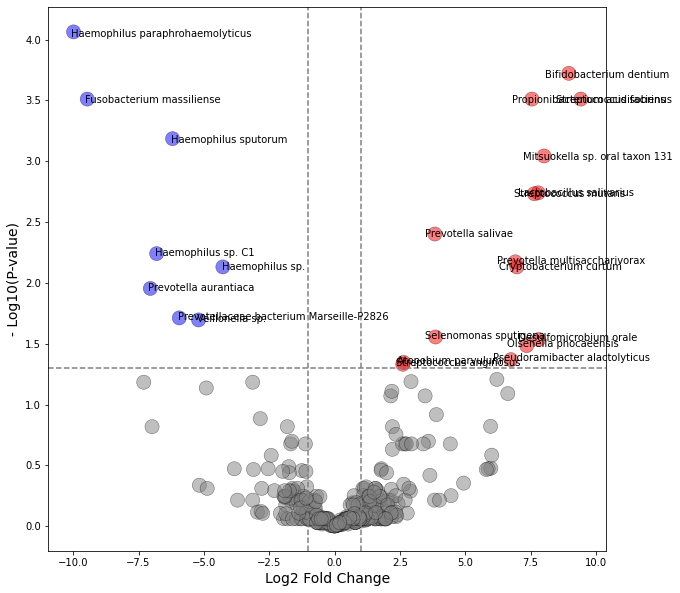

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
volcano( spdeg, 'log2FoldChange', 'padj', 1.0, 0.05, 200, ax=ax)
ax.set_xlabel('Log2 Fold Change',fontsize=14)
ax.set_ylabel('- Log10(P-value)',fontsize=14)
annot_volcano( spdeg,'Species' ,'log2FoldChange', 'padj', 1.0, 0.05, 10, ax=ax );

# UMAP

In [7]:
oral_tax = pd.read_csv('../data/metagenome/motus_profile.csv')
spnames = [ x.split('[ref')[0].split('[meta')[0].split('[ext')[0].\
           replace('[','').replace(']','').strip() for x in list(oral_tax['Species'])]
oral_tax['Species'] = spnames; oral_tax = oral_tax.rename(columns={'Species':'Sample'})
oral_tax = oral_tax.set_index(['Sample'])
oral_tax = oral_tax.T; oral_quant = oral_tax.groupby(oral_tax.columns, axis=1).sum();
threshold = pd.read_csv('../data/metagenome/Thresholds.csv')
oral_quant.head()

Sample  Abiotrophia defectiva  Acidaminococcus species incertae sedis  \
A10                  0.000198                                     0.0   
A11                  0.000440                                     0.0   
A1                   0.010644                                     0.0   
A20                  0.000000                                     0.0   
A28                  0.003256                                     0.0   

Sample  Acidovorax wautersii  Acinetobacter baumannii  Actinobacteria sp.  \
A10                      0.0                 0.000000            0.003645   
A11                      0.0                 0.000000            0.008368   
A1                       0.0                 0.000000            0.003527   
A20                      0.0                 0.000672            0.008431   
A28                      0.0                 0.000000            0.001518   

Sample  Actinobaculum sp. oral taxon 183  Actinomyces bouchesdurhonensis  \
A10                             0.000081                        0.000000   
A11                             0.000030                        0.016645   
A1                              0.000910                        0.000000   
A20                             0.001276                        0.000000   
A28                             0.000587                        0.000000   

Sample  Actinomyces dentalis  Actinomyces gerencseriae  \
A10                 0.000277                  0.000086   
A11                 0.000115                  0.000046   
A1                  0.000773                  0.000822   
A20                 0.001029                  0.001319   
A28                 0.000649                  0.000553   

Sample  Actinomyces graevenitzii  ...  Veillonella denticariosi  \
A10                     0.005495  ...                       0.0   
A11                     0.016826  ...                       0.0   
A1                      0.001720  ...                       0.0   
A20                     0.004478  ...                       0.0   
A28                     0.000000  ...                       0.0   

Sample  Veillonella dispar  Veillonella parvula  Veillonella rogosae  \
A10               0.002468             0.001105             0.041786   
A11               0.015411             0.003669             0.000787   
A1                0.001753             0.003181             0.011843   
A20               0.004752             0.022527             0.007487   
A28               0.000752             0.003571             0.018238   

Sample  Veillonella sp.  Veillonella species incertae sedis  \
A10            0.001101                            0.003468   
A11            0.000278                            0.039186   
A1             0.013361                            0.006406   
A20            0.002804                            0.016425   
A28            0.001710                            0.003183   

Sample  Veillonella tobetsuensis  Weissella confusa  \
A10                     0.004988                0.0   
A11                     0.000157                0.0   
A1                      0.002494                0.0   
A20                     0.000000                0.0   
A28                     0.001323                0.0   

Sample  Weissella paramesenteroides  unassigned  
A10                             0.0    0.071457  
A11                             0.0    0.034749  
A1                              0.0    0.043114  
A20                             0.0    0.035508  
A28                             0.0    0.042862  

[5 rows x 373 columns]

In [19]:
X = oral_tax.iloc[:,1:].values
X = StandardScaler().fit_transform(X)
reducer_sp = umap.UMAP(random_state=42)
embedding = reducer_sp.fit_transform(X)
umap_pd = pd.DataFrame(embedding, columns =['UMAP-1','UMAP-2'])
umap_pd['Group'] = ['A (20~30yr)' for i in range(10)] + ['B (55~80yr)' for i in range(10)]

/home/bras5181/miniconda3/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


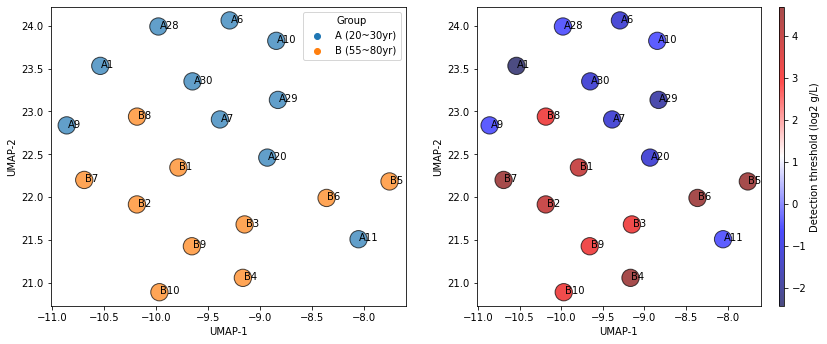

In [20]:
fig, axs = plt.subplots(1,2,figsize=(14,5.5))
sns.scatterplot(x='UMAP-1', y='UMAP-2',hue="Group",
            linewidth=1,data=umap_pd, s=300, alpha=0.7, edgecolor='black', ax=axs[0])
for i in range(len(umap_pd.index)):
    x,y=list(umap_pd['UMAP-1'])[i]*0.999, list(umap_pd['UMAP-2'])[i]*0.999
    axs[0].text(x,y,s=list(oral_quant.index)[i])
pt1=axs[1].scatter( umap_pd['UMAP-1'], umap_pd['UMAP-2'], c=np.log2(threshold['Detection threshold']), 
                   cmap='seismic',alpha=0.7,s=300, edgecolor='black')
plt.colorbar(pt1, label='Detection threshold (log2 g/L)', aspect=50)
for i in range(len(umap_pd.index)):
    x,y=list(umap_pd['UMAP-1'])[i]*0.999, list(umap_pd['UMAP-2'])[i]*0.999
    axs[1].text(x,y,s=list(oral_quant.index)[i])
for ax in axs:
    ax.set_xlabel('UMAP-1'); ax.set_ylabel('UMAP-2')

In [8]:
genus_quant = oral_quant.copy()
for col in genus_quant.columns:
    genus_quant=genus_quant.rename(columns={col:col.split(' ')[0]})
genus_quant = genus_quant.groupby(genus_quant.columns, axis=1).sum();

In [9]:
A_quant = oral_quant.iloc[:10].drop(['unassigned'],axis=1); B_quant=oral_quant.iloc[10:].drop(['unassigned'],axis=1);
Asp_avg = pd.DataFrame( A_quant.mean(axis=0), columns=['Average']).sort_values(['Average'],ascending=False)
Bsp_avg = pd.DataFrame( B_quant.mean(axis=0), columns=['Average']).sort_values(['Average'],ascending=False)

In [10]:
Agenus_quant = genus_quant.iloc[:10].drop(['unassigned'],axis=1);
Bgenus_quant = genus_quant.iloc[10:].drop(['unassigned'],axis=1);
Ag_avg = pd.DataFrame( Agenus_quant.mean(axis=0), columns=['Average']).sort_values(['Average'],ascending=False)
Bg_avg = pd.DataFrame( Bgenus_quant.mean(axis=0), columns=['Average']).sort_values(['Average'],ascending=False)

# MAGs

In [2]:
Abin_quant = pd.read_csv('../data/metagenome/A_bin_abundance_table.tab',sep='\t');
Bbin_quant = pd.read_csv('../data/metagenome/B_bin_abundance_table.tab',sep='\t');
Abin_qc = pd.read_csv('../data/metagenome/A_metawrap_90_10_bins.stats',sep='\t');
Bbin_qc = pd.read_csv('../data/metagenome/B_metawrap_90_10_bins.stats',sep='\t');

In [3]:
# Aclass = pd.read_csv('../data/metagenome/A_gtdbtk.tsv',sep='\t');
# Bclass = pd.read_csv('../data/metagenome/B_gtdbtk.tsv',sep='\t');
# def process_class(text):
#     g = text.split(';g__')[1].split(';s__')[0].strip()
#     sp=text.split(';s__')[1]
#     if sp=='':
#         sp='unknown'
#     return {'genus':g,'species':sp}

In [4]:
# bins=list(Aclass.user_genome)
# tax=[ process_class(text) for text in Aclass.classification]
# Aclass_pd = pd.DataFrame(tax); Aclass_pd['bin_id']=bins;
# Aclass_pd.to_csv('../data/metagenome/A_species.csv',index=None);
# bins=list(Bclass.user_genome)
# tax=[ process_class(text) for text in Bclass.classification]
# Bclass_pd = pd.DataFrame(tax); Bclass_pd['bin_id']=bins;
# Bclass_pd.to_csv('../data/metagenome/B_species.csv',index=None);

In [5]:
Aclass = pd.read_csv('../data/metagenome/A_species.csv');
Bclass = pd.read_csv('../data/metagenome/B_species.csv');

In [12]:
# fig, axs = plt.subplots(1,4,figsize=(20,4))
# o1=venn2([set(list(Ag_avg.index)[:50]),set(Aclass['genus'])],set_labels=('Top 50','MAGs'),ax=axs[0])
# o2=venn2([set(list(Asp_avg.index)[:50]),set(Aclass['species'])],set_labels=('Top 50','MAGs'),ax=axs[1])
# o3=venn2([set(list(Bg_avg.index)[:50]),set(Bclass['genus'])],set_labels=('Top 50','MAGs'),ax=axs[2])
# o4=venn2([set(list(Bsp_avg.index)[:50]),set(Bclass['species'])],set_labels=('Top 50','MAGs'),ax=axs[3])
# axs[0].set_title('A group genus levels'); axs[1].set_title('A group species levels');
# axs[2].set_title('B group genus levels'); axs[3].set_title('B group species levels');

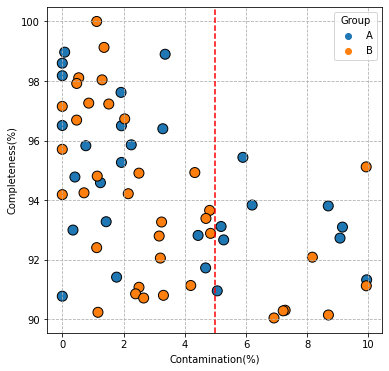

In [13]:
qc_pd = pd.DataFrame(zip(list(Abin_qc['completeness'])+list(Bbin_qc['completeness']),
                        list(Abin_qc['contamination'])+list(Bbin_qc['contamination']),
                        ['A' for i in range(len(Abin_qc.index))]+['B' for i in range(len(Bbin_qc.index))]), 
                     columns=['Completeness(%)','Contamination(%)','Group'])
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(data=qc_pd,x='Contamination(%)',y='Completeness(%)',hue='Group',
                edgecolor='black',linewidth=1,s=100,ax=ax)
ax.grid(ls='--')
ax.axvline(x=5,color='red',ls='--')

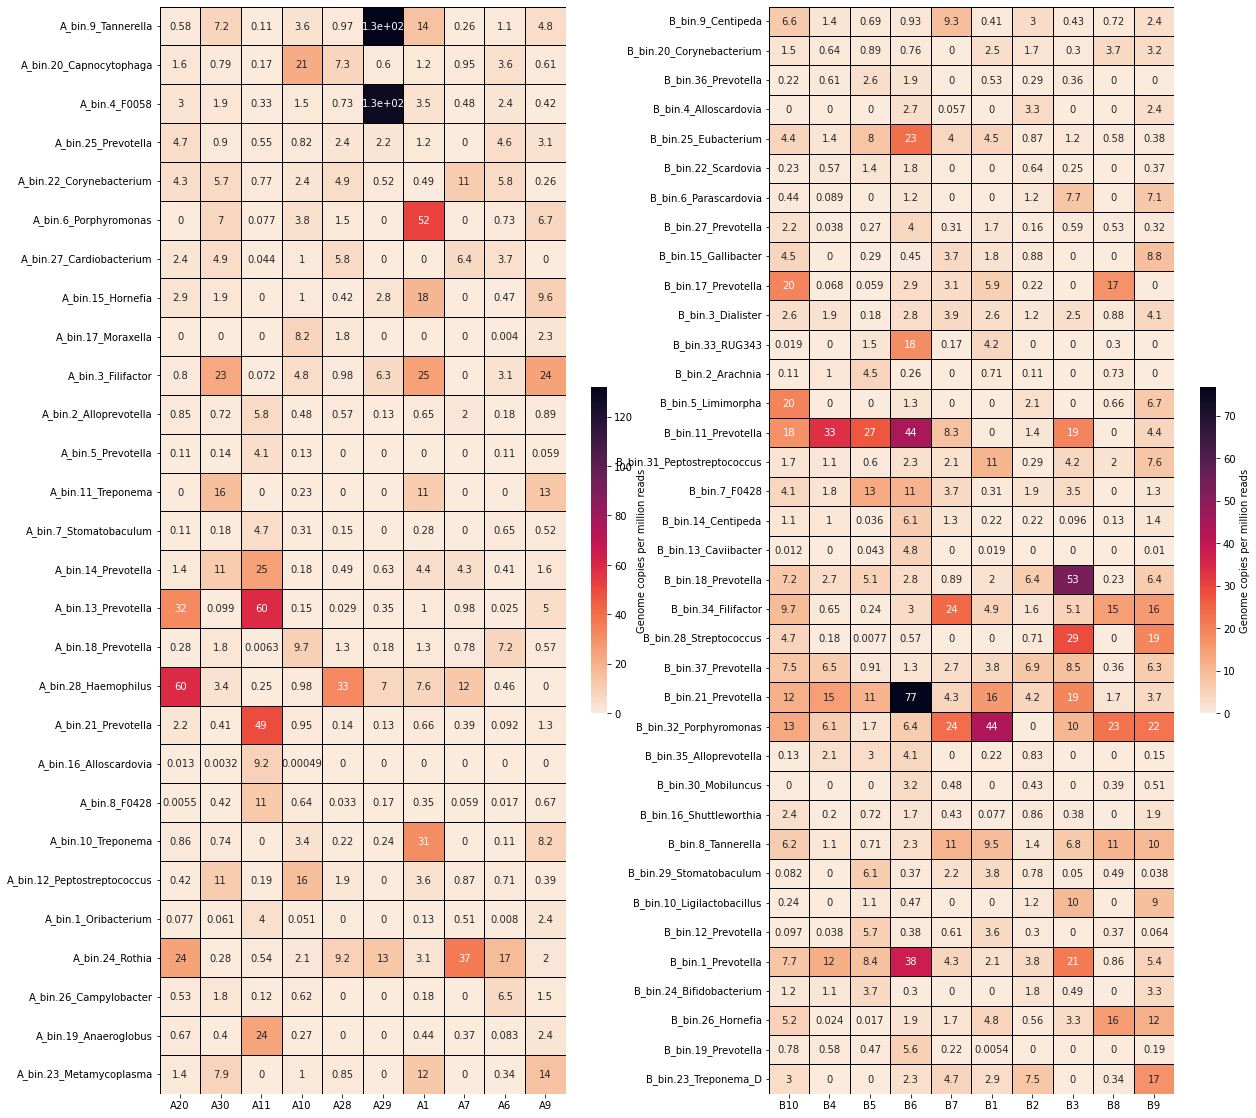

In [14]:
Aticks = [ 'A_'+x+'_'+list(Aclass[Aclass['bin_id']==x]['genus'])[0]for x in Abin_quant['Genomic bins']]
Bticks = [ 'B_'+x+'_'+list(Bclass[Bclass['bin_id']==x]['genus'])[0]for x in Bbin_quant['Genomic bins']]
fig, axs = plt.subplots(1,2,figsize=(20,20))
sns.heatmap(data=Abin_quant.iloc[:,1:], yticklabels=Aticks,cmap ="rocket_r",
            cbar_kws={"shrink": 0.3,'label':'Genome copies per million reads'},
            linewidths=0.8,linecolor="black",annot=True,ax=axs[0]);
sns.heatmap(data=Bbin_quant.iloc[:,1:],yticklabels=Bticks,cmap ="rocket_r",
            cbar_kws={"shrink": 0.3, 'label':'Genome copies per million reads'},
            linewidths=0.8,linecolor="black",annot=True,ax=axs[1]);

In [15]:
Abin_quant = pd.read_csv('../data/metagenome/A_bin_abundance_table.tab',sep='\t');
Bbin_quant = pd.read_csv('../data/metagenome/B_bin_abundance_table.tab',sep='\t');
Abin_quant =Abin_quant.set_index(['Genomic bins']); Bbin_quant =Bbin_quant.set_index(['Genomic bins']); 
Abin_avg = pd.DataFrame( Abin_quant.mean(axis=1) ,columns=['CPM'])
Bbin_avg = pd.DataFrame( Bbin_quant.mean(axis=1) ,columns=['CPM'])
Abin_avg = Abin_avg.sort_values(['CPM'],ascending=False); Bbin_avg = Bbin_avg.sort_values(['CPM'],ascending=False); 

In [57]:
Bbin_avg[Bbin_avg['CPM']<1.0]

CPM
Genomic bins          
bin.16        0.860282
bin.4         0.847583
bin.19        0.780603
bin.2         0.748555
bin.36        0.646246
bin.22        0.525265
bin.30        0.498117
bin.13        0.492825

## QS proteins

In [3]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [8]:
# qs_records=[]
# for i in range(len(qsdb.index)):
#     seq = list(qsdb['AA senquence'])[i].strip()
#     ID = 'ID:'+list(qsdb['QS protein'])[i] + ' Type:' + list(qsdb['Protein type'])[i]
#     qs_records.append( SeqRecord(Seq(seq), id = ID, name="",description="") )
# SeqIO.write(qs_records, '../data/metagenome/qs_proteins.fasta' ,"fasta")

213

In [4]:
def comple_array(arr1,arr2):
    arr = arr1+arr2
    arr = arr>0
    return [int(x) for x in arr]

In [9]:
# qsdb = pd.read_csv('../data/metagenome/QSdb.csv')
# all_qs = list(np.unique( qsdb['Protein type']))
# blast_files = listdir('../data/QS_blast/')
# qs_data = []
# for f in blast_files:
#     temp = {k:0 for k in all_qs}
#     temp['bin_id'] = f.replace('.QS.txt','')
#     with open('../data/QS_blast/'+f) as file:
#         if sum(['#' not in line for line in file])==0:
#             qs_data.append(temp)
#             continue
#     temp_pd = pd.read_csv( '../data/QS_blast/'+f,comment='#', sep='\t', header=None)
#     temp_pd.columns=['query_id', 'subject_id', 'percent_identity', 'alignment_length',
#               'mismatches', 'gap_opens', 'query_start', 'query_end','subject_start', 'subject_end', 'e_value', 'bit_score']
#     matched = list( np.unique( list(temp_pd['query_id']) ) )
#     matched = [x.replace('ID:','') for x in matched]
#     found_types = np.unique( list( qsdb[qsdb['QS protein'].isin(matched)]['Protein type'] ) )
#     for k in found_types:
#          temp[k] = 1
#     qs_data.append(temp)
# qs_matched = pd.DataFrame(qs_data)
# for col in qs_matched.columns:
#     if '/' in col:
#         qs_matched[col.split('/')[0]]=list(qs_matched[col])
#         qs_matched[col.split('/')[1]]= comple_array(qs_matched[col],qs_matched[col.split('/')[1]])
#         qs_matched = qs_matched.drop([col],axis=1)

In [10]:
# qs_matched = qs_matched.rename(columns={'4-hydroxy-3-(11-methyldodecyl)-6-(2-methylpropyl)-pyranone synthases':'Pyranone synthases'})
# qs_matched = qs_matched.set_index(['bin_id'])
# qs_matched.to_csv('../data/metagenome/QS_matched.csv')

In [17]:
Aclass = pd.read_csv('../data/metagenome/A_species.csv');
Bclass = pd.read_csv('../data/metagenome/B_species.csv');
qs_matched = pd.read_csv('../data/metagenome/QS_matched.csv')
qs_matched = qs_matched.rename(columns={'bin_id':'QS proteins'})
qs_matched = qs_matched.set_index(['QS proteins'])
qs_matched = qs_matched.T
A_cols = []; B_cols = [];
for bin_id in Aclass.bin_id:
    qs_matched = qs_matched.rename(columns={'A_'+bin_id:'A_'+bin_id+'_'\
                                            +list(Aclass[Aclass['bin_id']==bin_id]['genus'])[0] })
    A_cols.append( 'A_'+bin_id+'_'+list(Aclass[Aclass['bin_id']==bin_id]['genus'])[0])
for bin_id in Bclass.bin_id:
    qs_matched = qs_matched.rename(columns={'B_'+bin_id:'B_'+bin_id\
                                            +'_'+list(Bclass[Bclass['bin_id']==bin_id]['genus'])[0] })
    B_cols.append('B_'+bin_id+'_'+list(Bclass[Bclass['bin_id']==bin_id]['genus'])[0])

A_qs = qs_matched[A_cols]; B_qs = qs_matched[B_cols];

Text(0.5, 1.2, 'A Group')

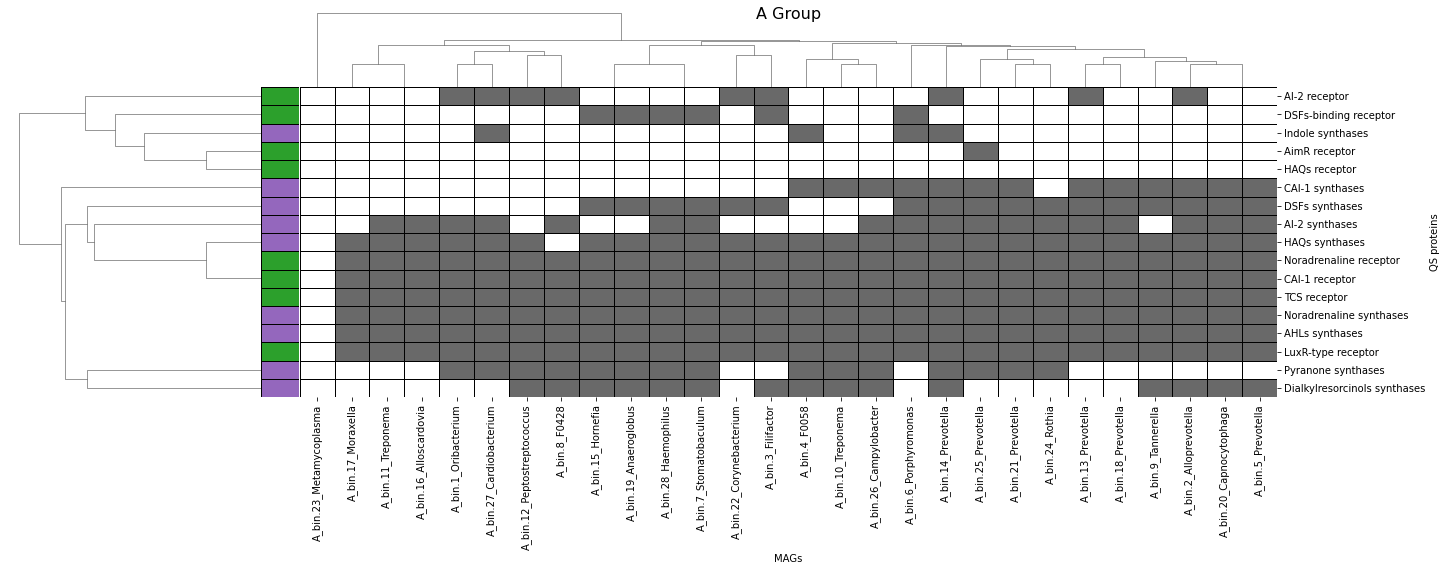

In [31]:
row_colors=[]
for qsp in A_qs.index:
    if 'recep' in qsp:
        row_colors.append('tab:green')
    else:
        row_colors.append('tab:purple')
fg=sns.clustermap(A_qs, figsize=(20,8),cmap =['white', 'dimgray'],cbar_kws={'ticks':[0,1.0]},
               row_colors=row_colors,linecolor='black',linewidths=1, cbar_pos=None)
fg.ax_heatmap.set_xlabel('MAGs')
fg.ax_heatmap.set_ylabel('QS proteins')
fg.ax_heatmap.set_title('A Group',y=1.2,fontsize=16)

Text(0.5, 1.3, 'B Group')

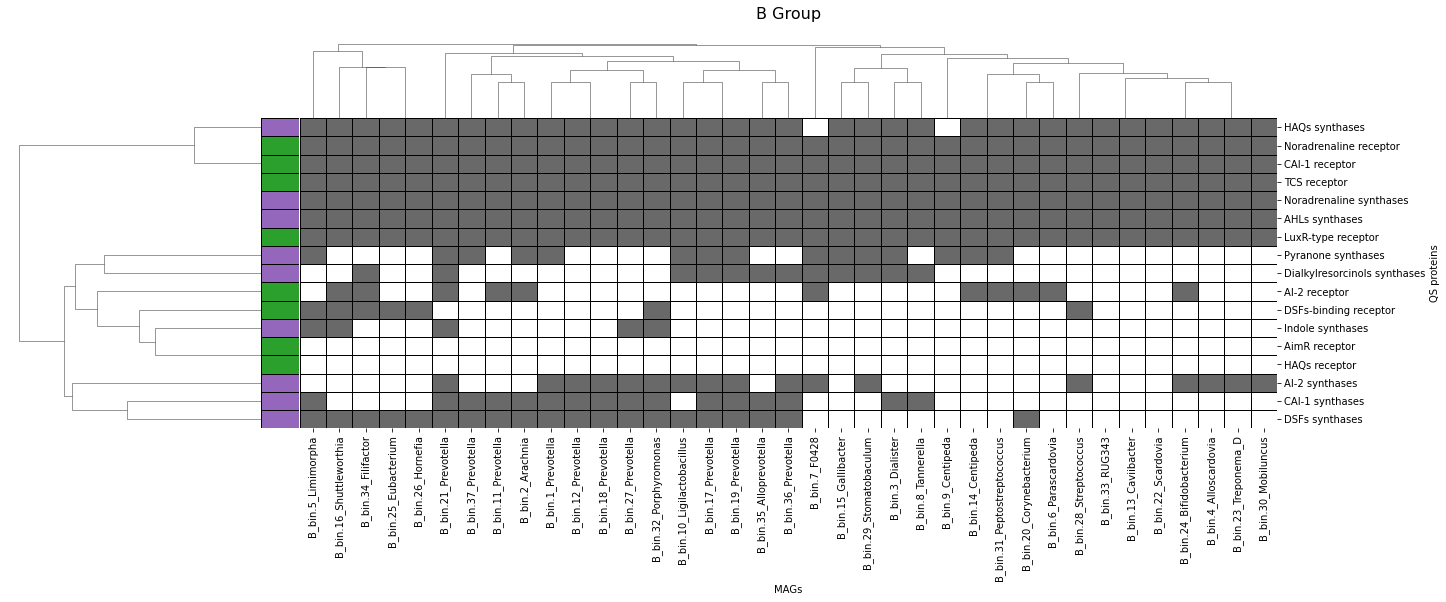

In [33]:
row_colors=[]
for qsp in B_qs.index:
    if 'recep' in qsp:
        row_colors.append('tab:green')
    else:
        row_colors.append('tab:purple')
fg=sns.clustermap(B_qs, figsize=(20,8),cmap =['white', 'dimgray'],cbar_kws={'ticks':[0,1.0]},
               row_colors=row_colors,linecolor='black',linewidths=1, cbar_pos=None)
fg.ax_heatmap.set_xlabel('MAGs')
fg.ax_heatmap.set_ylabel('QS proteins')
fg.ax_heatmap.set_title('B Group',y=1.3,fontsize=16)